In this project, I tokenized the text of the Twitter(X) users posts(tweets).

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer

In [ ]:
import re
import collections
from typing import List

In [ ]:
class BPETokenizer:
    def __init__(self, vocab_size: int) -> None:
        # Initialize the BPETokenizer with the given vocabulary size
        self.vocab_size = vocab_size
        self.vocab = collections.defaultdict(int)

    def train(self, corpus: List[str]) -> None:
        # Train the tokenizer on the given corpus
        for sent in corpus:
            for word in sent.split():
                # Count occurrences of word fragments in the vocabulary
                self.vocab[' '.join(word)] += 1

        # Iterate for the specified number of merges
        for step in range(self.vocab_size):
            pair_stats = collections.defaultdict(int)
            # Calculate statistics for pairs of symbols
            for word, freq in self.vocab.items():
                symbols = word.split()
                for i in range(len(symbols)-1):
                    pair_stats[symbols[i], symbols[i+1]] += freq
            # Find the most frequent pair
            best = max(pair_stats, key=pair_stats.get)

            merged = {}
            # Merge the most frequent pair in the vocabulary
            p = re.compile(r'(?<!\S)' + re.escape(' '.join(best)) + r'(?!\S)')
            for word in self.vocab:
                merged[p.sub(''.join(best), word)] = self.vocab[word]

            self.vocab = merged

    def tokenize(self, text: str) -> List[str]:
        # Tokenize the input text using the trained vocabulary
        tokens = []
        for word in text.split():
            symbols = word.split()
            for candidate in symbols:
                if candidate in self.vocab:
                    tokens.append(candidate)
                else:
                    # If candidate is not in the vocabulary, tokenize it into characters
                    for char in candidate:
                        tokens.append(char)
        return tokens

### Analysis on Tweets Dataset

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Create an empty list to store the tweets dataset
tweets_dataset = []

# Define the paths of the files containing the tweets
file_paths = ["file1", "file2", "file3", "file4", "file5"]

# Iterate over each file path
for file_path in file_paths:
    # Open each file and read its contents line by line
    with open(os.path.join("data", file_path), 'r', encoding='utf-8') as file:
        for line in file:
            # Append each line (tweet) to the tweets dataset after stripping any leading or trailing whitespace
            tweets_dataset.append(line.strip())

# Define a list of vocabulary sizes to experiment with
vocab_sizes = [250, 500, 750, 1000]

# Initialize an empty list to store tokenized tweets for each vocabulary size
all_tokenized_tweets: List[List[List[str]]] = []

# Iterate over each vocabulary size
for size in vocab_sizes:
    # Initialize a BPETokenizer object with the current vocabulary size
    tokenizer = BPETokenizer(size)

    # Train the tokenizer on the tweets dataset
    tokenizer.train(tweets_dataset)

    # Initialize an empty list to store tokenized tweets
    tokenized_tweets: List[List[str]] = []

    # Tokenize each tweet in the dataset using the trained tokenizer
    for tweet in tweets_dataset:
        tokenized_tweets.append(tokenizer.tokenize(tweet))

    # Append the tokenized tweets for the current vocabulary size to the list
    all_tokenized_tweets.append(tokenized_tweets)

# Calculate the average lengths of tokenized tweets for each vocabulary size
avg_lengths = []
for tokenized_tweets in all_tokenized_tweets:
    # Compute the average length of tokenized tweets using NumPy and append it to the list
    avg_lengths.append(np.mean([len(tweet) for tweet in tokenized_tweets]))


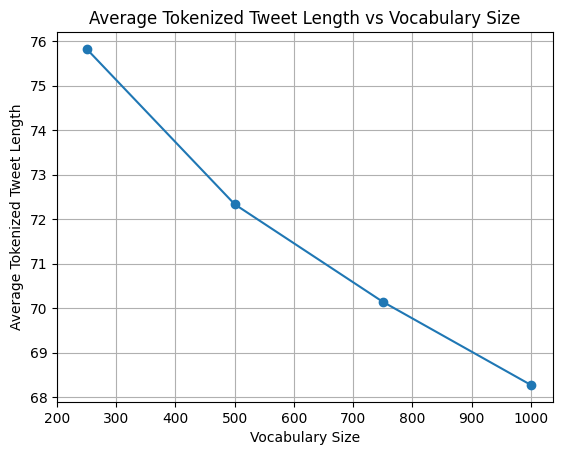

In [ ]:
# Plot the graph
plt.plot(vocab_sizes, avg_lengths, marker='o')
plt.xlabel('Vocabulary Size')
plt.ylabel('Average Tokenized Tweet Length')
plt.title('Average Tokenized Tweet Length vs Vocabulary Size')
plt.grid(True)
plt.xticks(np.arange(200, max(vocab_sizes) + 1, step=100))
plt.show()

A larger vocabulary size of 1000 is better than smaller ones because it makes it possible for the tokenizer to extract more specific and varied words and patterns from the tweets. This makes it possible for the tokenizer to tokenize the tweets more thoroughly and accurately, which can enhance the comprehension and processing of the tweets.

### Analysis on Dataset of Different Language

In [ ]:
import pandas as pd

In [ ]:
# Loading the dataset from the CSV file
df = pd.read_csv('data\espanol.csv')

# Converting the dataset into a flattened one-dimensional list
esp_dataset = df.values.flatten().tolist()

# Specifying vocabulary sizes
vocab_sizes = [250, 500, 750, 1000]

# Initializing a list to store tokenized sentences
all_tokenized_sents: List[List[List[str]]] = []

# Processing each vocabulary size
for size in vocab_sizes:
    # Initializing a tokenizer with the specified vocabulary size
    tokenizer = BPETokenizer(size)

    # Training the tokenizer on the Spanish dataset
    tokenizer.train(esp_dataset)

    # Initializing a list to store tokenized sentences of the current vocabulary size
    tokenized_sents: List[List[str]] = []

    # Tokenizing each sentence in the dataset
    for sent in esp_dataset:
        tokenized_sents.append(tokenizer.tokenize(sent))

    # Adding tokenized sentences of the current vocabulary size to the overall list
    all_tokenized_sents.append(tokenized_sents)

# Computing the average lengths of sentences for each vocabulary size
avg_lengths = []
for tokenized_sents in all_tokenized_sents:
    avg_lengths.append(np.mean([len(sent) for sent in tokenized_sents]))

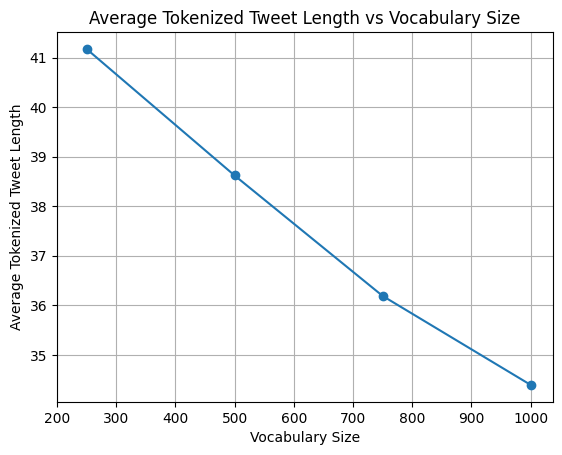

In [ ]:
# Plot the graph
plt.plot(vocab_sizes, avg_lengths, marker='o')
plt.xlabel('Vocabulary Size')
plt.ylabel('Average Tokenized Tweet Length')
plt.title('Average Tokenized Tweet Length vs Vocabulary Size')
plt.grid(True)
plt.xticks(np.arange(200, max(vocab_sizes) + 1, step=100))
plt.show()

As the vocabulary grows, the tokenized sentence's average length gets shorter. This occurs because the tokenizer can represent words more effectively with a higher vocabulary size, resulting in shorter tokenized representations of the same sentences. Put another way, as it learns more words, the tokenizer becomes more adept at segmenting tweets into smaller parts, resulting in tokenized phrases that are generally shorter.
